In [1]:
cd /home/ubuntu/11777/src/baselines/refexp/Google_Refexp_toolbox/

/home/ubuntu/11777/src/baselines/refexp/Google_Refexp_toolbox


In [2]:
import scipy
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.patches as mpatches
import sys
import os
import json
import tempfile

# MAKE Sure that google_refexp_py_lib is in your python libary search path
# before you run API in this toolbox. You can use something as follows:
sys.path.append('./google_refexp_py_lib')
from refexp_eval import RefexpEvalComprehension
from refexp_eval import RefexpEvalGeneration
from common_utils import draw_bbox

# Set coco_data_path and Google Refexp dataset validation set path
coco_data_path = './external/coco/annotations/instances_train2014.json'
refexp_dataset_path = './google_refexp_dataset_release/google_refexp_val_201511_coco_aligned.json'

In [3]:
# Load Google Refexp dataset and MS COCO dataset (takes some time)
eval_compreh = RefexpEvalComprehension(refexp_dataset_path, coco_data_path)

Loading Google Refexp dataset file for the comprehension task.
loading annotations into memory...
Done (t=16.05s)
creating index...
index created!
Dataset loaded.


In [4]:
data_path = '/home/ubuntu/11777/data/refexp/'

with open('%s/google_refexp_val_201511_coco_aligned_and_labeled.json' % data_path, 'r') as fp:
    labeled_data = json.load(fp)

In [5]:
predictions = []
with open('%s/predictions_2.json' % data_path, 'r') as fp:
    for line in fp:
        pred = json.loads(line)
        ann = labeled_data['annotations'][str(pred['annotation_id'])]
        b = ann['boxes']
        l = pred['logits']
        predictions.append({
            'annotation_id': pred['annotation_id'],
            'refexp_id': pred['refexp_id'],
#             'predicted_bounding_boxes': [ann['boxes'][pred['predicted_id']]]
            'predicted_bounding_boxes': zip(*sorted(zip(*[l, b]), reverse=True))[1]
        })

In [6]:
fd, eval_path = tempfile.mkstemp()
with os.fdopen(fd, 'w') as tmp:
    json.dump(predictions, tmp)

In [41]:
samples = []
import cPickle
img_id2idx = cPickle.load(open('../../../../data/refexp/val36_imgid2idx.pkl'))

for x in labeled_data['annotations'].values():
    a = x['annotation_id']
    if x['image_id'] in val_ids:
        for r in x['refexp_ids']:
            samples.append((a,r))
len(samples)

9536

In [37]:
val_ids = cPickle.load(open('../../../../data/refexp/val_ids.pkl'))

In [40]:
list(val_ids)[0]

524291

In [7]:
(prec, eval_results) = eval_compreh.evaluate(eval_path, thresh_k=1)
(prec, eval_results) = eval_compreh.evaluate(eval_path, thresh_k=2)
(prec, eval_results) = eval_compreh.evaluate(eval_path, thresh_k=3)
os.remove(eval_path)

Loading predicted result file for the comprehension task.
Missing 3777 objects in the refexp dataset file in the predicted file
Missing 7197 refexps in the refexp dataset file in the predicted file
The average prec@1 score is 0.681
Loading predicted result file for the comprehension task.
Missing 3777 objects in the refexp dataset file in the predicted file
Missing 7197 refexps in the refexp dataset file in the predicted file
The average prec@2 score is 0.797
Loading predicted result file for the comprehension task.
Missing 3777 objects in the refexp dataset file in the predicted file
Missing 7197 refexps in the refexp dataset file in the predicted file
The average prec@3 score is 0.842


In [14]:
len(set([(rid, ann['annotation_id']) for rid in ann['refexp_ids'] for ann in labeled_data['annotations'].values()])), len(predictions)

(10000, 2339)

In [16]:
bad_results = [res for res in eval_results if res['best_iou'] < 0.05]

In [20]:
coco_image_dir = './external/coco/images/train2014'
samples = [np.random.randint(0,len(bad_results)) for _ in range(20)]

The Referring expression input to the model is:
  Man sitting on bottom bunk looking at books.


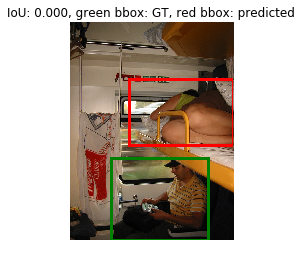

The Referring expression input to the model is:
  A skier in the track wearing spectacles with another.


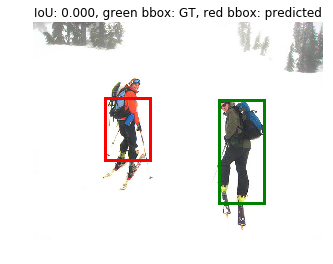

The Referring expression input to the model is:
  The fold out chair next to the mini refrigerator.


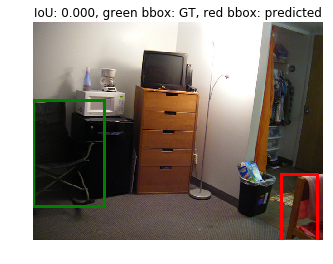

The Referring expression input to the model is:
  A hot dog with tomatoes and a pickles.


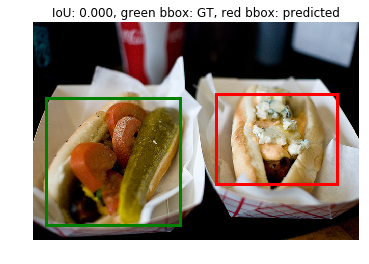

The Referring expression input to the model is:
  A red and white train sitting on the tracks while a man in a green shirt approaches it.


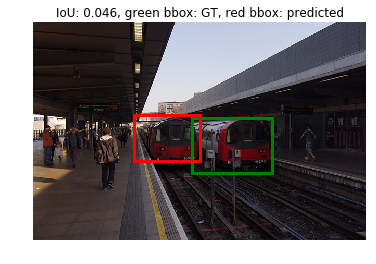

The Referring expression input to the model is:
  A computer monitor with a cartoon skull on it.


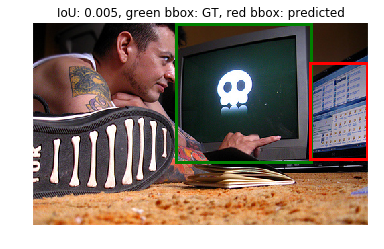

The Referring expression input to the model is:
  The white couch on the right


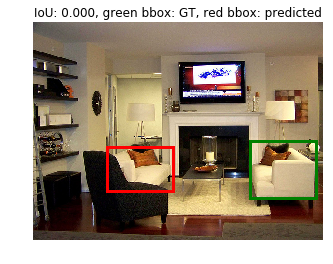

The Referring expression input to the model is:
  Two empty vases near a vase of flowers; one is clear glass and the other is opaque white.


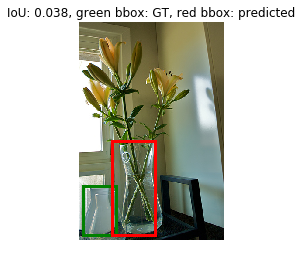

The Referring expression input to the model is:
  Middle turkey.


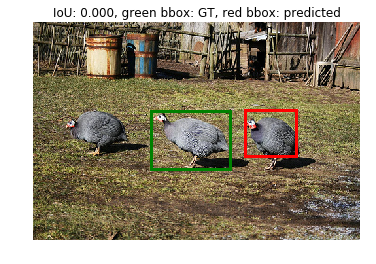

The Referring expression input to the model is:
  chocolate cup cake decorated with gems


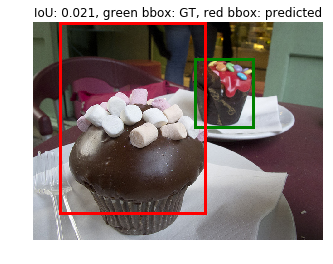

The Referring expression input to the model is:
  a chocolate dessert with a strawberry on top


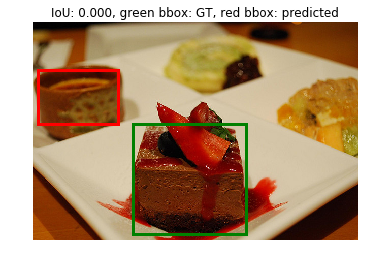

The Referring expression input to the model is:
  A man with curly hair waiting to get the frisbee.


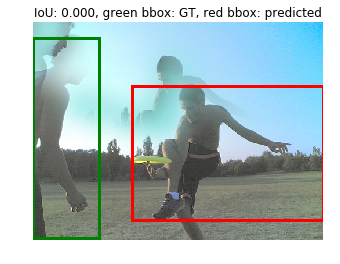

The Referring expression input to the model is:
  man skating in the right side of the image


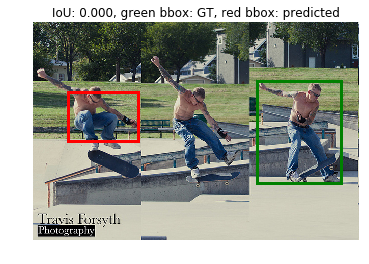

The Referring expression input to the model is:
  The reflection of the bigger horse.


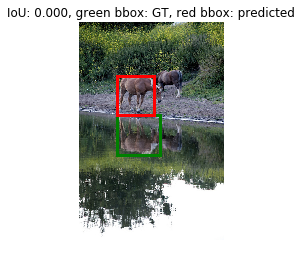

The Referring expression input to the model is:
  The back of a black chair sitting empty on the far side of the table.


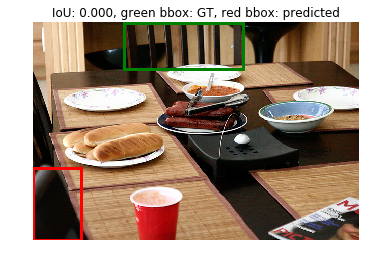

The Referring expression input to the model is:
  A silver vase.


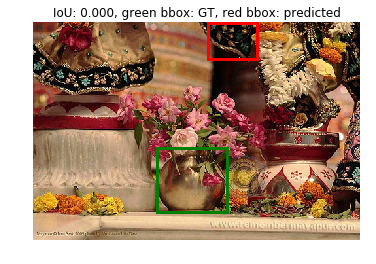

The Referring expression input to the model is:
  A man without a hat about to catch a frisbee.


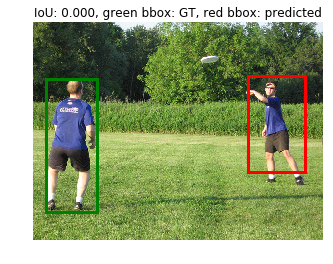

The Referring expression input to the model is:
  An elephant carrying two people on its back and a stick in its mouth


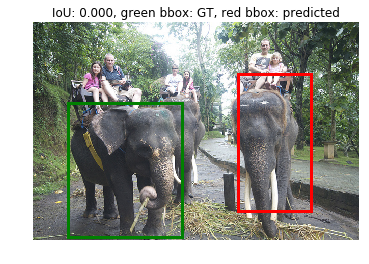

The Referring expression input to the model is:
  The shorter blue bike on the right.


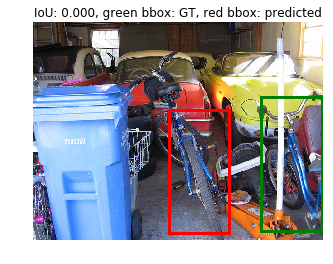

The Referring expression input to the model is:
  man skating in the right side of the image


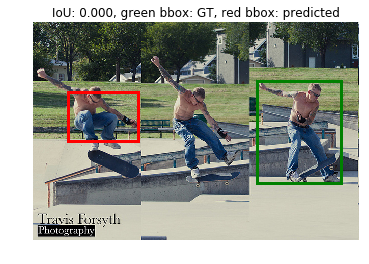

In [44]:
for sample_id in samples:
    bad_sample = bad_results[sample_id]
    plt.figure(sample_id)
    eval_compreh.visualize_top_predicted_bbox(bad_sample, coco_image_dir)
    plt.show()
#     time.sleep(5)

In [48]:
ann_id = bad_sample['annotation_id']
ann = eval_compreh.refexp_dataset.loadAnns(ids=[ann_id])[0]
image_id = ann['image_id']
img_coco = eval_compreh.refexp_dataset.loadImgs(ids=[image_id])[0]
eval_compreh.coc

{u'coco_url': u'http://mscoco.org/images/251009',
 u'date_captured': u'2013-11-20 04:53:31',
 u'file_name': u'COCO_train2014_000000251009.jpg',
 u'flickr_url': u'http://farm5.staticflickr.com/4152/4953976279_e2b0e00f32_z.jpg',
 u'height': 427,
 u'image_id': 251009,
 u'license': 3,
 u'region_candidates': [{u'bounding_box': [99, 244, 126, 71],
   u'predicted_object_name': u'skateboard'},
  {u'bounding_box': [427, 111, 151, 143], u'predicted_object_name': u'person'},
  {u'bounding_box': [307, 293, 109, 46],
   u'predicted_object_name': u'skateboard'},
  {u'bounding_box': [77, 121, 140, 134], u'predicted_object_name': u'person'},
  {u'bounding_box': [260, 121, 144, 207], u'predicted_object_name': u'person'},
  {u'bounding_box': [492, 112, 146, 215], u'predicted_object_name': u'person'},
  {u'bounding_box': [193, 200, 85, 31], u'predicted_object_name': u'bench'},
  {u'bounding_box': [361, 210, 30, 27], u'predicted_object_name': u'person'},
  {u'bounding_box': [432, 29, 11, 11], u'predicted_

In [49]:
good_results = [res for res in eval_results if res['best_iou'] > 0.05]
good_samples = [np.random.randint(0,len(good_results)) for _ in range(20)]

The Referring expression input to the model is:
  white car


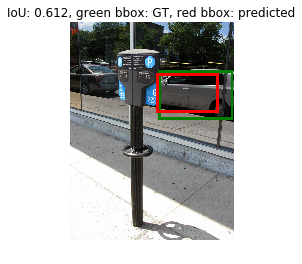

The Referring expression input to the model is:
  A woman with a red shirt and khaki shorts.


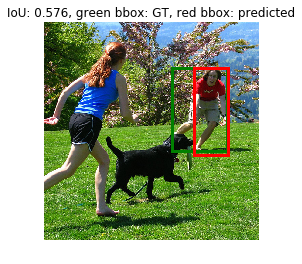

The Referring expression input to the model is:
  A black desk chair by a daybed with a cat in the background


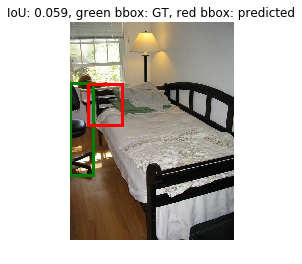

The Referring expression input to the model is:
  a horse trainer in a blue jacket  leading  a horse


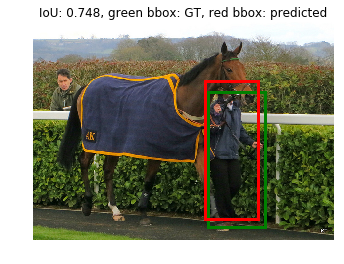

The Referring expression input to the model is:
  A lamb standing broadside in front of a taller lamb.


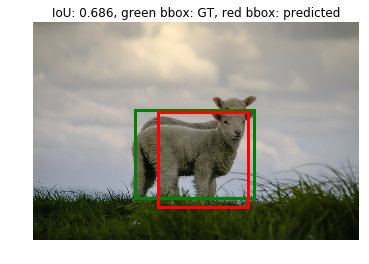

The Referring expression input to the model is:
  Plants landscapped on the side of the house directly to the side and behind the boy holding a tennis racquet


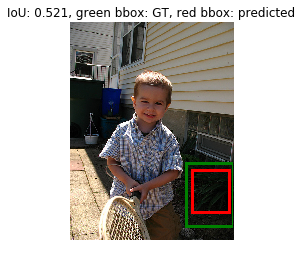

The Referring expression input to the model is:
  a women in tha watar


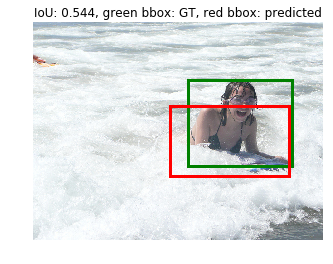

The Referring expression input to the model is:
  black bench


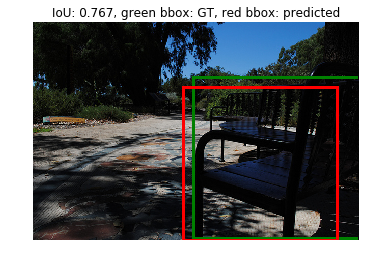

The Referring expression input to the model is:
  three brown cows in a field getting herded by a dog


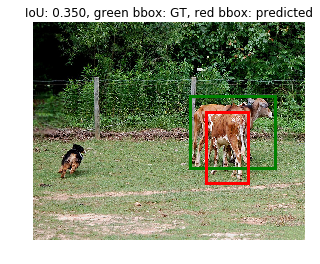

The Referring expression input to the model is:
  A personalized motorcycle featuring skulls.


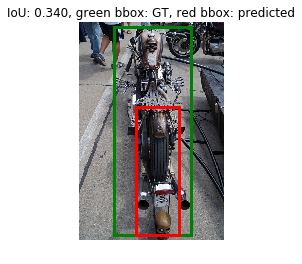

The Referring expression input to the model is:
  The blue car going off to the right


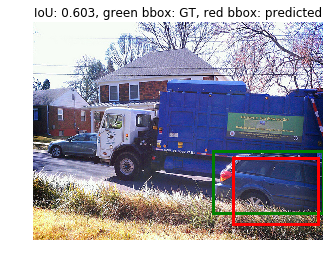

The Referring expression input to the model is:
  A blurry car driving right under the stop light


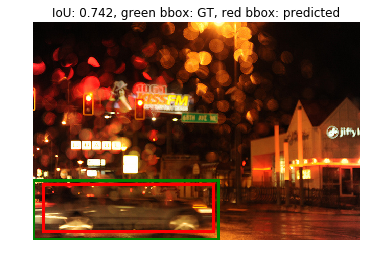

The Referring expression input to the model is:
  White and red boat.


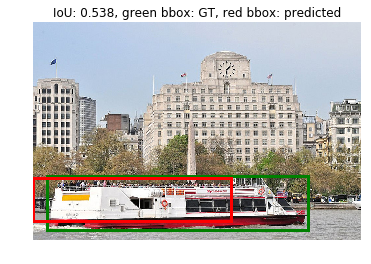

The Referring expression input to the model is:
  The horse on the left.


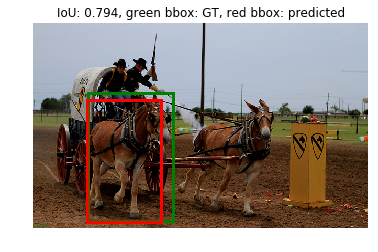

The Referring expression input to the model is:
  A wooden picnic bench with a man sitting next to it


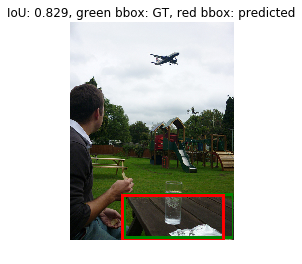

The Referring expression input to the model is:
  A long train pulling cars of differing shapes and sizes.


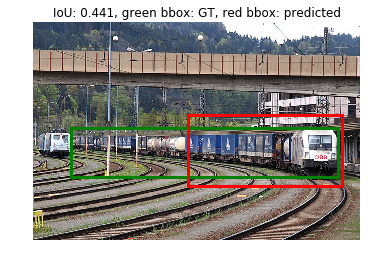

The Referring expression input to the model is:
  a silver coloured double dacker buss passing through a street


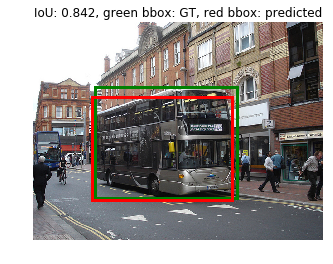

The Referring expression input to the model is:
  The gentleman in the white shirt and black pants, swinging a tennis racket to hit a tennis ball.


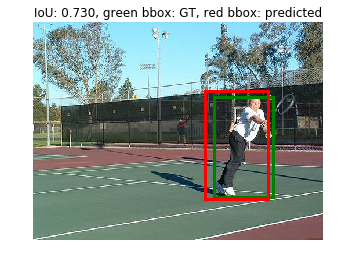

The Referring expression input to the model is:
  A guy sitting near oven


In [ ]:
for sample_id in good_samples:
    good_sample = good_results[sample_id]
    plt.figure(sample_id)
    eval_compreh.visualize_top_predicted_bbox(good_sample, coco_image_dir)
    plt.show()

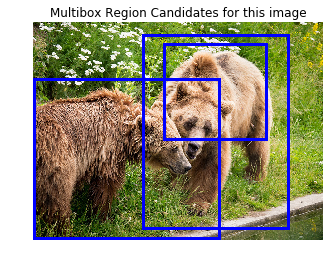

In [12]:
I = io.imread(os.path.join(imagesDir, imagesType, img['file_name']))
plt.figure()
plt.imshow(I)
ax = plt.axis('off')
plt.title('Multibox Region Candidates for this image')
refexp.showRegionCandidates(img)

Referring expressions for the object in the bounding box: 
a light colored brown bear facing the camera with darker brown patches around its eyes.
The large bear facing the other bear.


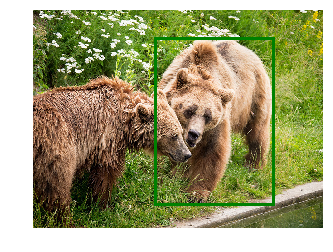

In [15]:
# Plot one annotation for the current image: bbox and referring expressions.
plt.imshow(I)
ax = plt.axis('off')
anns = refexp.getAnnIds(random_img_id)
for ann in 
ann = refexp.loadAnns(anns[1])[0]
refexp.showAnn(ann)

In [14]:
ann

{u'annotation_id': 586525,
 u'area': 73886.37785000003,
 u'bbox': [1.08, 135.17, 348.9, 340.23],
 u'category_id': 23,
 u'image_id': 564920,
 u'iscrowd': 0,
 u'refexp_ids': [95971, 95972],
 u'segmentation': [[169.03,
   439.64,
   178.78,
   417.97,
   179.86,
   410.38,
   184.2,
   375.71,
   195.03,
   352.96,
   199.37,
   339.95,
   205.87,
   330.2,
   222.12,
   315.03,
   237.29,
   313.95,
   263.3,
   329.12,
   279.55,
   329.12,
   284.97,
   325.87,
   309.89,
   334.54,
   329.39,
   334.54,
   349.98,
   325.87,
   345.64,
   309.62,
   339.14,
   294.45,
   330.47,
   271.69,
   328.31,
   259.77,
   325.06,
   245.69,
   302.3,
   200.18,
   296.88,
   190.43,
   284.97,
   172.01,
   264.38,
   174.18,
   250.29,
   182.84,
   227.54,
   164.42,
   178.78,
   144.92,
   130.02,
   135.17,
   70.43,
   162.26,
   22.75,
   173.09,
   1.08,
   188.26,
   3.25,
   408.22,
   14.09,
   451.56,
   20.59,
   466.73,
   20.59,
   467.81,
   53.09,
   475.4,
   74.76,
   472.1